# Primer clustering con scikit-learn

## Importar librerías y carga de datos de prueba

In [ ]:
from sklearn.datasets import make_blobs # datasets de prueba
import pandas as pd
import matplotlib.pyplot as plt

La librería make_blobs de sklearn se utiliza para generar conjuntos de datos sintéticos para problemas de clustering. Permite crear puntos de datos distribuidos en varias "blobs" o grupos, facilitando la visualización y la prueba de algoritmos de clustering como K-means. Puedes especificar el número de clusters, la cantidad de muestras y la variación de los datos, lo que te permite experimentar con diferentes configuraciones de datos de manera efectiva.

In [2]:
# crear 100 datapoints con 4 clusters, 2 features definiendo la desviacion
# estandar de cada cluster
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

In [3]:
# verificamos los valores de x
x

array([[ -3.38426057,   5.22173974],
       [ -1.83623836,  -7.73538367],
       [ -7.45617621,   6.19887436],
       [ -1.78504307,   1.60974874],
       [-10.1249098 ,   6.1338052 ],
       [  1.0146433 ,   4.0453507 ],
       [ -0.70092735,  -6.98196818],
       [  8.99757441,  -2.30228718],
       [ -7.9192539 ,   5.72225675],
       [  1.9445622 ,  -7.43742299],
       [ -0.93442649,  -7.78820426],
       [ 11.48819121,   1.33719026],
       [ -2.86067816, -11.24623446],
       [ -7.90577233,   4.84553865],
       [ -2.24228315,   4.38550238],
       [  0.56928691, -10.0571088 ],
       [  0.6237701 ,  -6.12033956],
       [  8.32594634,   0.04535295],
       [ -2.11937574, -10.1833945 ],
       [ -6.70767333,   5.26896209],
       [ -2.52855036,   5.03085908],
       [ -8.19937429,   4.07185131],
       [ -8.86097416,   7.62744807],
       [  0.25552915, -12.26658908],
       [  7.09274235,   1.13571881],
       [ -8.51922024,   4.14769715],
       [  9.58876813,  -2.81738008],
 

> Notamos que los valores de x estan constituido por dos features

In [4]:
# verificamos los valores de y
y

array([1, 3, 0, 1, 0, 1, 3, 2, 0, 3, 3, 2, 3, 0, 1, 3, 3, 2, 3, 0, 1, 0,
       0, 3, 2, 0, 2, 2, 3, 1, 3, 3, 1, 3, 3, 0, 2, 0, 1, 0, 3, 1, 1, 2,
       1, 2, 0, 0, 2, 0, 2, 3, 2, 3, 1, 0, 1, 3, 1, 1, 1, 3, 1, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 3, 1, 1, 1, 0, 3, 2, 3, 2, 0,
       0, 1, 3, 1, 0, 3, 2, 2, 3, 1, 0, 1])

> Los valores de y van de 0 a 3 lo cual corresponden a los 4 centroides. 

Ahora, creamos un dataframe con los datos antes definidos.

In [6]:
df_blobls = pd.DataFrame({
    'x1': x[:,0], # feature 1
    'x2':x[:,1],  # feature 2
    'y':y         # valores de cluster
})

In [7]:
df_blobls

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


> Tenemos los valores de las features 1 y 2 y a que cluster pertenecen. Vamos a utilizar los valores de __y__ para comprobar los datos mas no para crear los clusteres ya que no es una tarea de clasificacion.

Definimos una funcion que nos permita visualizar los clusteres en 2D.

In [17]:
# parametros: x(df con los puntos), y(etiqueta de los clusters), ax(eje donde se grafican)
def plot_2d_clusters(x,y,ax):
    # se obtienen las etiquetas unicas de los cluters
    y_uniques = pd.Series(y).unique()
    # se recorre cada etiqueta unica
    for _ in y_uniques:
        # filtra los puntos de la etiqueta actual y lo grafica
        x[y==_].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker = f'${_}$',
            s=70,
            ax = ax
        )

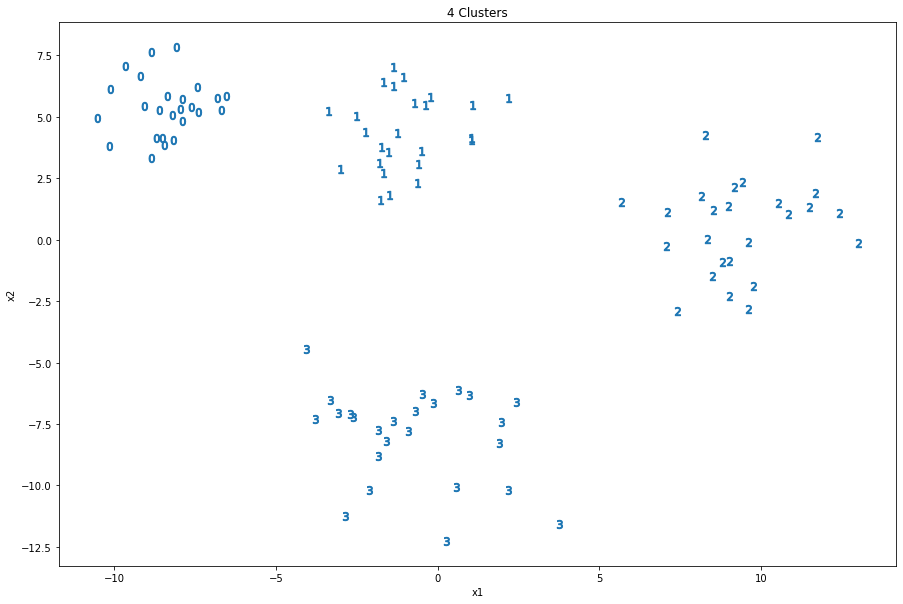

In [18]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
x, y = df_blobls[['x1','x2']], df_blobls['y']
plot_2d_clusters(x,y,ax)

> Vemos la formacion de 4 cluster donde se agrupan los datos. 

Otra forma de visualizar los cluster es la siguiente:

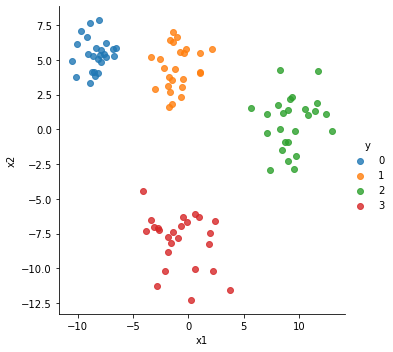

In [11]:
import seaborn as sns

sns.lmplot(
    x='x1', 
    y='x2', 
    hue='y', 
    data=df_blobls,
    fit_reg=False
    );

## Aplicando clustering

In [12]:
# importamos el modelo K-means
from sklearn.cluster import KMeans

In [13]:
# definimos el modelo con el numero de cluster
kmeans = KMeans(n_clusters=5, random_state=7)

In [14]:
# entrenamos el modelo y guardamos las predicciones
y_pred = kmeans.fit_predict(x)

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ahora, graficamos la etiquetas actuales y las predichas para verificar si el modelo logra detectar las agrupaciones.

Text(0.5, 1.0, 'Kmeans 5 Clusters')

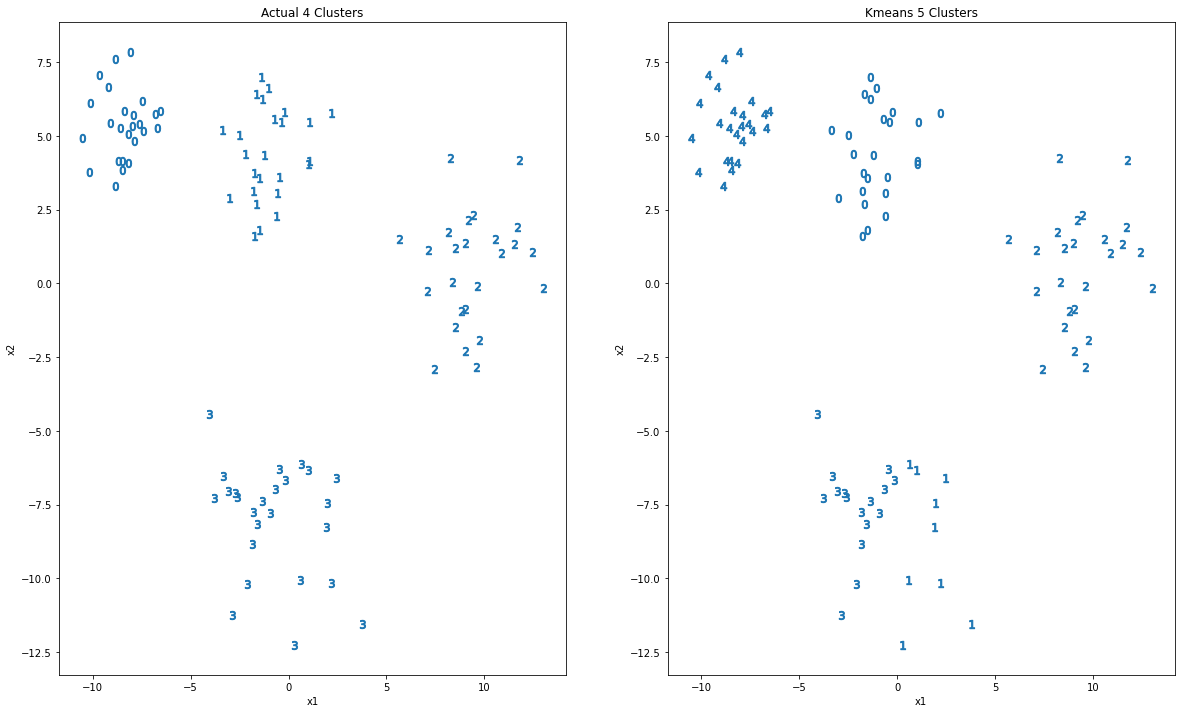

In [19]:
fig, axs = plt.subplots(1,2, figsize=(20,12))
plot_2d_clusters(x,y,axs[0])
plot_2d_clusters(x,y_pred,axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'Kmeans {axs[1].get_title()}')



> La grafica de la izquierda representan los datos reales junto a sus respectivas agrupaciones que en total son 4.

> La grafica de la derecha muestra las predicciones de los clusteres hecha por el modelo que como podemos notar detecta 5 clusteres ya que esa fue la cantidad pasada como parametro. Si se le pasa otra cantidad de cluster, buscara la forma de detectar esa cantidad 